In [1]:
import pandas as pd
import os
import sys
notebook_dir = os.path.abspath(os.getcwd())
src_path = os.path.join('/home/lerceg/LukaPosao/market_models/', 'src')
sys.path.append(src_path)

import importlib

import market_models.src.models.predict_model
import  market_models.src.utils as utils


In [18]:
data_name = 'netrisk_casco_v10'
#target_variable = 'KÖBE_price'
target_variable = 'UNION_price'
model_name = utils.get_model_name(data_name, target_variable)


data_path = utils.get_processed_data_path(data_name)
features_path = utils.get_features_path(data_name)
predictions_path = utils.get_model_cv_out_of_sample_predictions_path(model_name)

In [19]:
data, features = utils.load_data(data_path, features_path, target_variable)

10090
8413


In [20]:
predictions = pd.read_csv(predictions_path)[target_variable]

In [25]:
data['prediction'] = predictions
data['error'] = abs(predictions - data[target_variable])
data['error_percentage'] = data['error'] / data[target_variable] * 100

In [26]:
predictions

0        82824.414062
1       103532.507812
2       152009.921875
3        90433.601562
4       124609.992188
            ...      
8408     86644.343750
8409     89985.289062
8410     83753.445312
8411    119566.867188
8412     75821.937500
Name: UNION_price, Length: 8413, dtype: float64

In [27]:
predictions

0        82824.414062
1       103532.507812
2       152009.921875
3        90433.601562
4       124609.992188
            ...      
8408     86644.343750
8409     89985.289062
8410     83753.445312
8411    119566.867188
8412     75821.937500
Name: UNION_price, Length: 8413, dtype: float64

In [28]:
data[data['isRecent'] == True].sort_values(by = ['error'], ascending = False)

,DateCrawled,isRecent,CarMake,CarAge,ccm,kw,kg,car_value,CarMakerCategory,PostalCode,...,Longitude,Latitude,Age,LicenseAge,BonusMalus,BonusMalusCode,UNION_price,error,error_percentage,prediction
7308,2024_01_05,True,47,1,1199,55,1055,17420.0,1.00,8156,...,18.3881,46.9574,35,18,0.0,1,63136.0,516322.625000,817.794325,579458.625000
8410,2024_01_06,True,66,1,1197,85,1390,25532.0,0.97,3662,...,20.3000,48.2167,19,18,0.0,1,505554.0,421800.554688,83.433333,83753.445312
6751,2024_01_05,True,47,1,1199,55,1055,17420.0,1.00,4456,...,21.1667,48.0167,35,18,0.0,1,66850.0,353046.062500,528.116773,419896.062500
8054,2024_01_06,True,66,1,1197,85,1390,25532.0,0.97,3418,...,20.6667,47.7667,40,18,0.0,1,202221.0,347104.750000,171.646243,549325.750000
7147,2024_01_05,True,47,1,1199,55,1055,17420.0,1.00,4100,...,21.5500,47.2167,35,18,0.0,1,63136.0,337075.187500,533.887461,400211.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,2024_01_08,True,45,9,1198,59,1036,10444.2,1.00,1083,...,19.0404,47.4984,45,18,5.0,6,84584.0,NaN,NaN,NaN
10086,2024_01_08,True,20,5,998,70,1160,13572.0,1.00,9125,...,17.5550,47.4628,59,18,0.0,1,90455.0,NaN,NaN,NaN
10087,2024_01_08,True,9,5,1199,50,1055,9828.0,1.00,2145,...,19.2829,47.5601,65,18,0.0,1,80057.0,NaN,NaN,NaN
10088,2024_01_08,True,47,2,1199,61,1174,21970.0,1.00,1054,...,19.0404,47.4984,55,18,0.0,1,115121.0,NaN,NaN,NaN


In [37]:
price_columns = data.filter(like = '_price').columns.to_list()
price_columns = [col for col in price_columns if col not in ['GENERTEL_price', 'SIGNAL_price']]
insurers = [col.replace('_price', '') for col in price_columns]
price_prediction_columns = [f'{DATA_NAME}_{col}_model' for col in price_columns]

In [38]:
data[price_columns]

,ALFA_price,ALLIANZ_price,GENERALI_price,GROUPAMA_price,K&AMP;H_price,KÖBE_price,MAGYAR_price,UNION_price,UNIQA_price,WÁBERER_price
0,156948.0,210720.0,126131.0,102780.0,199264.0,100650.0,NaN,82175.0,115246.0,167196.0
1,232728.0,208320.0,270092.0,142080.0,344622.0,116754.0,137964.0,146810.0,203799.0,NaN
2,133356.0,181440.0,229026.0,109356.0,163430.0,129564.0,100000.0,155078.0,150166.0,NaN
3,165864.0,148680.0,154209.0,178620.0,162550.0,100284.0,100000.0,81991.0,141611.0,NaN
4,176712.0,160920.0,228020.0,134844.0,220854.0,120414.0,NaN,139700.0,162120.0,206956.0
...,...,...,...,...,...,...,...,...,...,...
3101,119208.0,110880.0,135708.0,84252.0,209469.0,68808.0,NaN,92977.0,78538.0,70340.0
3102,80772.0,288600.0,89462.0,170136.0,NaN,75030.0,NaN,NaN,110554.0,NaN
3103,64932.0,98880.0,110600.0,61884.0,92837.0,101382.0,100000.0,65073.0,73726.0,59724.0
3104,75780.0,116040.0,104352.0,98328.0,129331.0,68808.0,100000.0,89919.0,94041.0,89196.0


In [39]:
predictions[price_prediction_columns]

,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_ALFA_price_model,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_ALLIANZ_price_model,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_GENERALI_price_model,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_GROUPAMA_price_model,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_K&AMP;H_price_model,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_KÖBE_price_model,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_MAGYAR_price_model,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_UNION_price_model,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_UNIQA_price_model,netrisk_casco_2023_11_14__2023_11_20__2023_12_12_WÁBERER_price_model
0,159915.380,262592.380,124386.50,102527.270,210071.080,100290.950,101516.260,80838.516,112827.180,168393.000
1,233971.810,224727.560,272535.00,142592.020,353438.250,116667.190,137004.110,143464.720,199203.140,199223.610
2,133300.300,201741.140,229386.64,110579.734,182030.390,129972.520,100086.280,155715.730,137818.520,228691.160
3,164419.220,152406.730,155043.84,184293.830,171342.550,100804.140,101368.420,81072.190,141841.120,216146.720
4,180234.610,219930.020,234515.45,135688.470,227263.100,121693.805,154857.360,140369.450,166925.300,205386.220
...,...,...,...,...,...,...,...,...,...,...
3101,116823.016,127529.086,136093.70,82099.320,223277.780,68829.375,99269.780,95114.760,107467.260,67744.820
3102,78638.520,346348.750,91135.73,166734.560,258702.200,76543.660,190508.880,103994.670,108668.400,351171.280
3103,63546.766,112556.190,111199.98,58890.777,100691.070,102157.690,100031.930,65159.350,64779.723,53309.715
3104,77010.590,166738.360,100308.11,97372.734,131022.700,69026.830,99696.110,89416.350,101443.984,91295.580


In [43]:
def add_rank(row, insurers, price_columns):
    prices = list(zip(insurers, row[price_columns]))
    prices = sorted(prices, key=lambda x: float('inf') if str(x[1]) == 'nan' else x[1])
    ranks = []
    for i, (ins, pr) in enumerate(prices):
        if str(pr) != 'nan':
            ranks.append((ins, i + 1))
        else:
            ranks.append((ins, None))
    ranks = sorted(ranks, key=lambda x: x[0])
    return pd.Series([x[1] for x in ranks])




In [44]:
rank_cols = [ins + '_rank' for ins in insurers]
data[rank_cols] = data.apply(lambda x: add_rank(x, insurers, price_columns), axis=1)

In [45]:
data[rank_cols]

,ALFA_rank,ALLIANZ_rank,GENERALI_rank,GROUPAMA_rank,K&AMP;H_rank,KÖBE_rank,MAGYAR_rank,UNION_rank,UNIQA_rank,WÁBERER_rank
0,6.0,9.0,5.0,3.0,8.0,2.0,NaN,1.0,4.0,7.0
1,7.0,6.0,8.0,3.0,9.0,1.0,2.0,4.0,5.0,NaN
2,4.0,8.0,9.0,2.0,7.0,3.0,1.0,6.0,5.0,NaN
3,8.0,5.0,6.0,9.0,7.0,3.0,2.0,1.0,4.0,NaN
4,6.0,4.0,9.0,2.0,8.0,1.0,NaN,3.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...
3101,7.0,6.0,8.0,4.0,9.0,1.0,NaN,5.0,3.0,2.0
3102,2.0,6.0,3.0,5.0,NaN,1.0,NaN,NaN,4.0,NaN
3103,3.0,7.0,10.0,2.0,6.0,9.0,8.0,4.0,5.0,1.0
3104,2.0,9.0,8.0,6.0,10.0,1.0,7.0,4.0,5.0,3.0


In [47]:
predictions[rank_cols] = predictions.apply(lambda x : add_rank(x, insurers, price_prediction_columns), axis = 1)

In [48]:
predictions[rank_cols]

,ALFA_rank,ALLIANZ_rank,GENERALI_rank,GROUPAMA_rank,K&AMP;H_rank,KÖBE_rank,MAGYAR_rank,UNION_rank,UNIQA_rank,WÁBERER_rank
0,7,10,6,4,9,2,3,1,5,8
1,8,7,9,3,10,1,2,4,5,6
2,4,8,10,2,7,3,1,6,5,9
3,7,5,6,9,8,2,3,1,4,10
4,6,8,10,2,9,1,4,3,5,7
...,...,...,...,...,...,...,...,...,...,...
3101,7,8,9,3,10,2,5,4,6,1
3102,2,9,3,6,8,1,7,4,5,10
3103,3,10,9,2,7,8,6,5,4,1
3104,2,10,7,5,9,1,6,3,8,4


<Axes: >

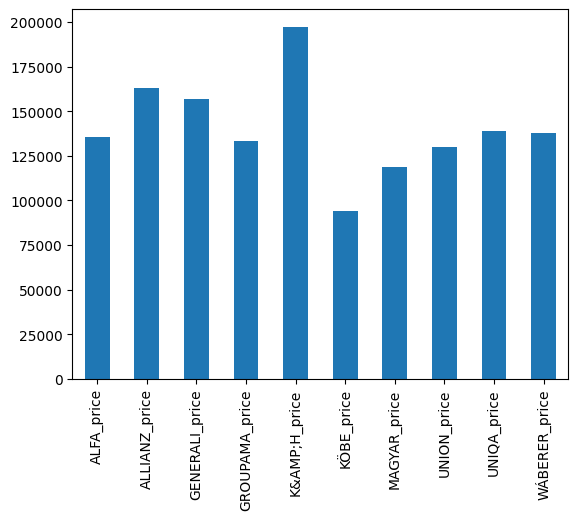

In [49]:
data[price_columns].mean(axis=0).plot(kind='bar')

<Axes: >

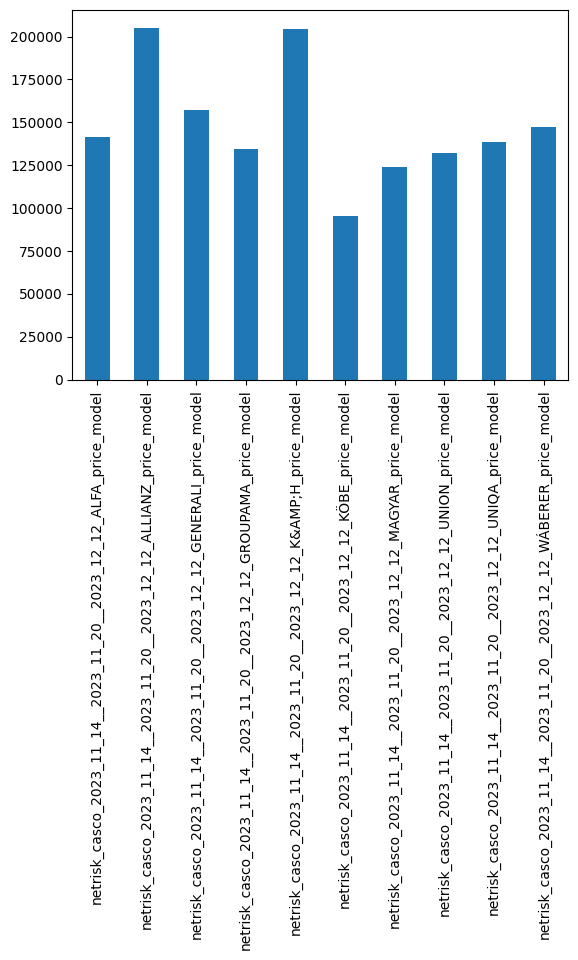

In [56]:
predictions[price_prediction_columns].mean(axis=0).plot(kind='bar')

In [57]:
def rank_analysis(profiles, price_cols, insurers):
    rank_cols = [ins + '_rank' for ins in insurers]
    profiles[rank_cols] = profiles.apply(lambda x : add_rank(x, insurers, price_cols), axis = 1)
    rank_value_counts = profiles[rank_cols].apply(pd.Series.value_counts)
    rank_percentage = rank_value_counts.apply(lambda x : x / x.sum(), axis = 1) * 100
    return rank_value_counts, rank_percentage

In [59]:
data_ranks, data_rank_percentages = rank_analysis(data, price_columns, insurers)

In [60]:
predictions_ranks, predictions_rank_percentages = rank_analysis(predictions, price_prediction_columns, insurers)

In [62]:
data_rank_percentages

,ALFA_rank,ALLIANZ_rank,GENERALI_rank,GROUPAMA_rank,K&AMP;H_rank,KÖBE_rank,MAGYAR_rank,UNION_rank,UNIQA_rank,WÁBERER_rank
1.0,7.501610,0.418545,2.124920,9.851900,0.386349,48.229234,5.441082,15.421764,3.283967,7.340631
2.0,14.133934,1.802962,5.151320,13.972956,1.126851,18.254990,12.813909,16.870573,9.079202,6.793303
3.0,13.301127,3.446055,9.049919,13.880837,2.801932,11.239936,9.243156,14.557166,14.106280,8.373591
4.0,12.705579,7.707191,10.544985,12.802322,4.224444,7.803934,9.093841,15.382135,14.027733,5.707836
5.0,12.121212,9.449332,13.229065,13.163897,6.158358,4.659498,9.547084,12.218964,13.652656,5.799935
6.0,14.304376,12.638798,15.022861,9.634226,10.385369,3.625082,7.609406,7.903331,13.096016,5.780536
7.0,12.674187,15.494360,14.631719,9.024552,13.503650,2.256138,8.294625,6.038487,12.242867,5.839416
8.0,6.804333,17.806364,15.538253,8.226134,22.511848,1.286391,7.379824,5.145565,9.343263,5.958023
9.0,3.107658,23.677395,10.913799,6.252312,29.670736,0.739919,6.511284,4.180540,7.325194,7.621162
10.0,1.795580,22.237569,13.881215,5.732044,29.281768,0.414365,8.011050,2.209945,7.182320,9.254144


In [63]:
predictions_rank_percentages

,ALFA_rank,ALLIANZ_rank,GENERALI_rank,GROUPAMA_rank,K&AMP;H_rank,KÖBE_rank,MAGYAR_rank,UNION_rank,UNIQA_rank,WÁBERER_rank
1,7.083065,0.064392,1.352222,9.240180,0.289762,47.520927,6.503542,15.260786,1.802962,10.882164
2,13.361236,0.547328,4.282035,11.268513,0.547328,19.381842,17.707663,15.518352,6.084997,11.300708
3,13.618802,0.837090,6.761108,14.133934,1.609788,11.944623,15.936896,13.264649,10.882164,11.010947
4,12.491951,1.287830,9.529942,13.747585,2.157115,8.177721,12.009015,14.842241,14.681262,11.075338
5,12.041211,2.672247,10.914359,14.262717,4.346426,4.925950,10.592402,13.457824,16.194462,10.592402
6,13.135866,4.571797,16.484224,10.302640,7.018674,3.573728,10.334836,9.658725,15.808113,9.111397
7,13.811977,7.662589,14.488088,8.628461,11.493883,2.253703,9.948487,6.439150,15.614939,9.658725
8,9.207985,12.556343,17.256922,6.793303,17.224726,1.738571,7.308435,4.732775,11.300708,11.880232
9,2.865422,24.919511,14.488088,6.793303,25.338055,0.386349,7.276240,4.668384,5.795235,7.469414
10,2.382486,44.880876,4.443014,4.829363,29.974243,0.096587,2.382486,2.157115,1.835158,7.018674


In [64]:
data_rank_percentages - predictions_rank_percentages

,ALFA_rank,ALLIANZ_rank,GENERALI_rank,GROUPAMA_rank,K&AMP;H_rank,KÖBE_rank,MAGYAR_rank,UNION_rank,UNIQA_rank,WÁBERER_rank
1.0,0.418545,0.354153,0.772698,0.611719,0.096587,0.708307,-1.062460,0.160979,1.481005,-3.541533
2.0,0.772698,1.255634,0.869285,2.704443,0.579524,-1.126851,-4.893754,1.352222,2.994205,-4.507405
3.0,-0.317675,2.608965,2.288812,-0.253097,1.192145,-0.704688,-6.693740,1.292517,3.224117,-2.637356
4.0,0.213628,6.419361,1.015043,-0.945263,2.067328,-0.373786,-2.915174,0.539894,-0.653529,-5.367502
5.0,0.080002,6.777085,2.314706,-1.098820,1.811931,-0.266452,-1.045318,-1.238860,-2.541807,-4.792467
6.0,1.168510,8.067002,-1.461363,-0.668414,3.366696,0.051353,-2.725430,-1.755394,-2.712098,-3.330862
7.0,-1.137790,7.831771,0.143631,0.396091,2.009767,0.002436,-1.653862,-0.400663,-3.372072,-3.819309
8.0,-2.403651,5.250022,-1.718669,1.432831,5.287122,-0.452179,0.071389,0.412790,-1.957445,-5.922209
9.0,0.242236,-1.242115,-3.574288,-0.540991,4.332681,0.353570,-0.764956,-0.487844,1.529959,0.151748
10.0,-0.586905,-22.643307,9.438202,0.902682,-0.692475,0.317777,5.628564,0.052829,5.347163,2.235470
